# Python Computer Vision
資訊之芽 梁安哲 2024/06/02

# Notes

這個主題是我第一年開，所以有節奏掌握不好的地方歡迎隨時給我回饋。

課程架構參考臺大電機系的選修課：[EEE5053 Computer Vision: from
Recognition to Geometry](http://media.ee.ntu.edu.tw/courses/cv/23S/)

# Outline

1. Computer Vision Intro
2. Image Processing
3. Image Filters
4. Image Classification
5. Remarks
6. Homework

# Computer Vision Intro

## What is Computer Vision ?
![](./image/1.png)

讓電腦跟人類一樣看東西的技術。

## A Bit of History
![](./image/2-s.jpg)

"電腦視覺"這個概念緣起於一個 MIT 大一學生的暑假專題。[link](https://people.csail.mit.edu/brooks/idocs/AIM-100.pdf)

## A Bit of History Cont.

![](./image/3.png)


## A Bit of History Cont.

![](./image/4.png)

使用各種複雜的數學模型執行任務。

## A Bit of History Cont.

![](./image/5.png)

ImageNet 是一個電腦視覺的圖片分類競賽，AlexNet 在2012年達到約15%的準確率，開啟了在電腦視覺任務中使用深度學習技術的浪潮。

# Image Processing

## Before we start
1. `pip install opencv-python`
2. `pip install matplotlib`
3. 準備一個獨立的資料夾裝所有檔案
4. 下載範例資料 [link]()

## Import Packages

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Read Image

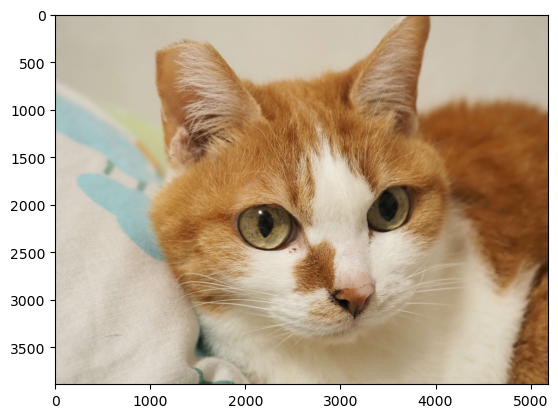

In [3]:
image = cv2.imread("./sample/cat.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()  # 為什麼要使用 cv2.cvtColor ?

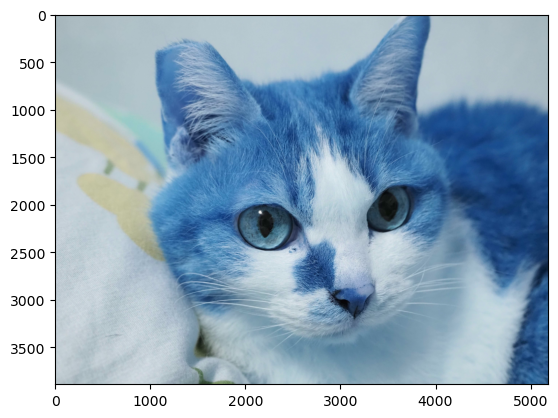

In [4]:
image = cv2.imread("./sample/cat.jpg")
plt.imshow(image)
plt.show()

## Image Size

In [5]:
image = cv2.imread("./sample/cat.jpg")
print(image.shape)

(3888, 5184, 3)


## Grayscale

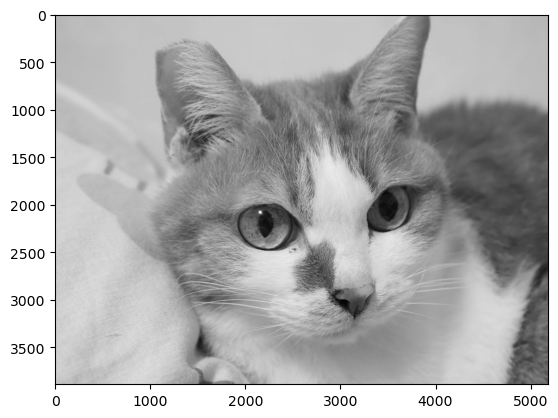

In [6]:
image = cv2.imread("./sample/cat.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

## Rotate

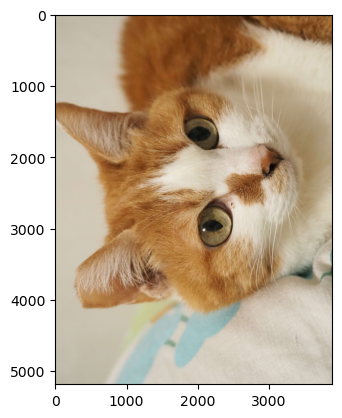

In [7]:
image = cv2.imread("./sample/cat.jpg")
rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

## Custom Rotation

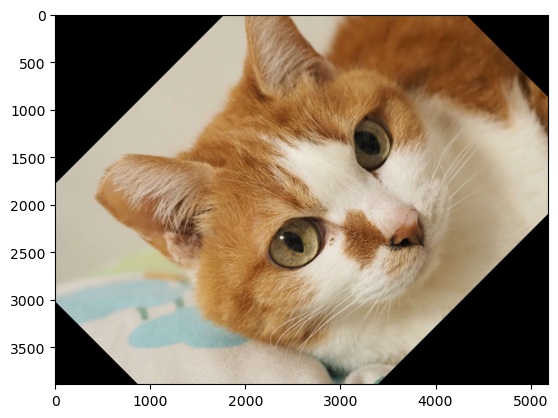

In [8]:
image = cv2.imread("./sample/cat.jpg")
image_center = tuple(np.array(image.shape[1::-1]) / 2)
rotation_matrix = cv2.getRotationMatrix2D(image_center, 45, 1.0)
rotated_image = cv2.warpAffine(
    image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

## Crop

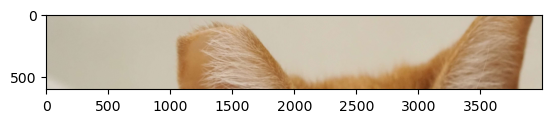

In [9]:
image = cv2.imread("./sample/cat.jpg")
cropped_image = image[200:800, :4000]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

## Overlay

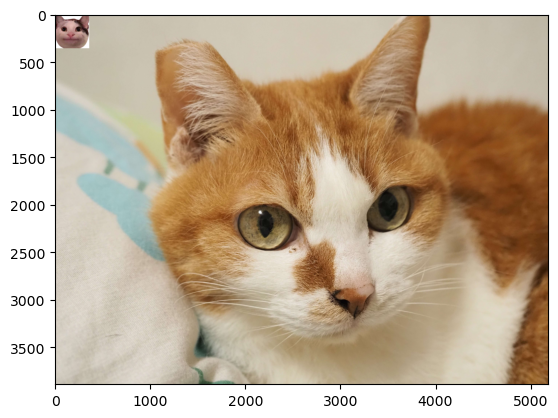

In [22]:
image = cv2.imread("./sample/cat.jpg")
beluga = cv2.imread("./sample/beluga.jpg")
beluga_height , beluga_width , beluga_depth = beluga.shape
image[:beluga_height,:beluga_width , :beluga_depth] = beluga
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



## Practice
1. 把我家貓的鼻子框出來
2. 翻轉180度
![](./image/6.png)

# Image Filter

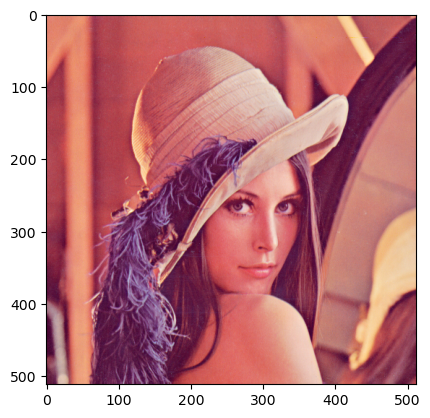

In [23]:
image = cv2.imread("./sample/leena.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Blur

高斯模糊可以去除圖片中的雜訊，但也會讓圖片變模糊。

![](./image/7.png)

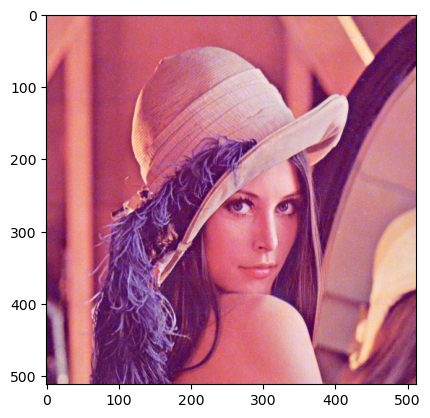

In [24]:
image = cv2.imread("./sample/leena.png")
noise = np.zeros(image.shape, np.uint8)
mean = 0
stddev = 50
cv2.randn(noise, mean, stddev)
noisy_image = cv2.add(image , noise)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.show()

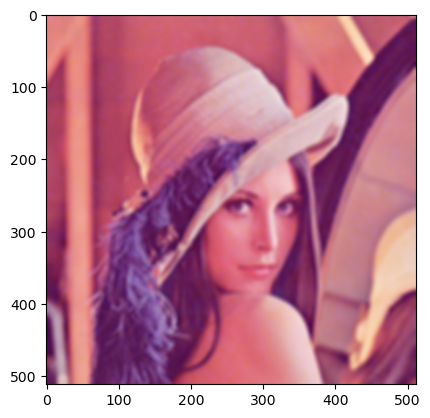

In [25]:
blurred_image = cv2.GaussianBlur(noisy_image, (9, 9) , 3)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()

## Contrast

### Algorithm

![](./image/11.png)

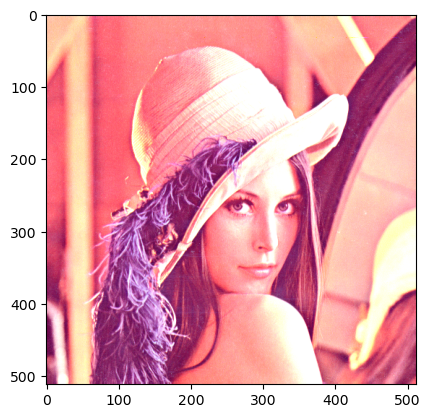

In [26]:
image = cv2.imread("./sample/leena.png")
enhanced_image = cv2.convertScaleAbs(image, alpha=1.5, beta=0) 
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.show()


## Sharpen

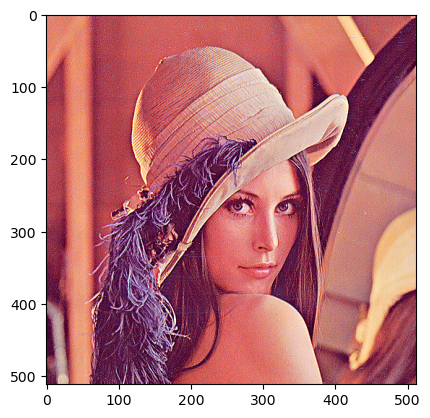

In [27]:
image = cv2.imread("./sample/leena.png")
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel) 
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.show()

## Edge Dection

### Algorithm

![](./image/8.png)

詳細演算法：[opencv.org](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

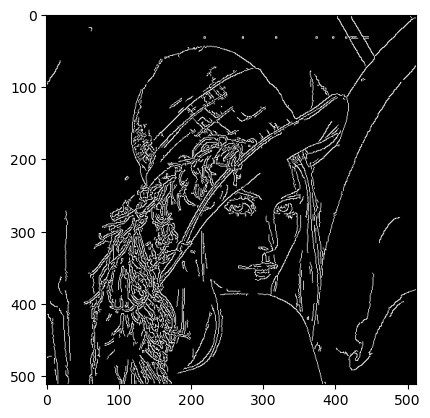

In [28]:
image = cv2.imread("./sample/leena.png")
th1 = 100
th2 = 200
edges = cv2.Canny(image, th1, th2) 
plt.imshow(edges , cmap="gray")
plt.show()

## Practice

1. 從網路上找一張自己喜歡的圖片
2. 對圖片施加負片後像的效果

# Image Classification

## Machine Learning

有些問題的解法沒辦法很明確的被定義，因此無法人工的方法寫完所有的規則。

例如：如何辨別畫面中的人是男是女、如何把中文翻譯成英文。

機器學習為一種人工智慧的分支，讓程式可以透過我們提供的資料找出問題的解決方法，因此才有"訓練"機器學習模型一說。

![](./image/13-s.png)

## 高中生也會的 Deep Learning

所謂問題的解決方法可被視為一個函數 $f(x)$，深度學習代表的是用類似神經元的方式構造一個複雜的函數 $f(x)$，並在訓練的過程中逐步決定各個權重的值為何，讓 $f(x)$ 與訓練資料的差異最小。

![](./image/14.png)

## 高中生也會的 Deep Learning Cont.

舉最簡單的例子，假設我們的模型為 $f(x)=ax+b$ ，訓練資料有 $g(0)=1$ 和 $g(1)=2$

雖然我們可以很直觀的解出 $a,b$ 兩個參數的最佳解是 $a=1,b=1$ ，但我們可以構造一個函數 $L(a,b)$ 代表 $f(x)$ 和 $g(x)$ 的差異有多大。

則訓練的過程便是想要找到 $L(a,b)$ 的最小值 ，在實務上會對 $L(a,b)$ 這個函數進行偏微分（概念上類似取函數圖形的切線）找出兩個參數 $a,b$ 應該要變動的方向。

![](./image/15-s.jpg)

## Convolution Neural Network

卷積層可以利用圖片的空間特性，抽取圖片的局部特徵（如邊緣、顏色）讓後面的神經元更能了解圖片代表什麼。

![](./image/16.png)

關於卷積神經網路的細節，可以參考李宏毅教授的[教學影片](https://www.youtube.com/watch?v=OP5HcXJg2Aw)（或把整個系列看完也行


## Alexnet

![](./image/17-s.png)

- kernel size: 卷積運算執行的範圍大小
- stride: 每次卷積運算移動的步數
- pad: 矩陣邊緣補 0 的層數 

## 呼叫深度學習模型！

1. `pip install torch torchvision torchaudio`
2. 以下的範例會使用比較小的模型 `resnet18`，不然有可能在電腦上跑太久。

In [29]:
import torch
model_name = "resnet18"
model = torch.hub.load('pytorch/vision:v0.10.0', model_name, pretrained=True)
model.eval()
params = sum(p.numel() for p in model.parameters())
print(f"{model_name} 共有 {params} 個參數")

Using cache found in /home/namwoam/.cache/torch/hub/pytorch_vision_v0.10.0


resnet18 共有 11689512 個參數


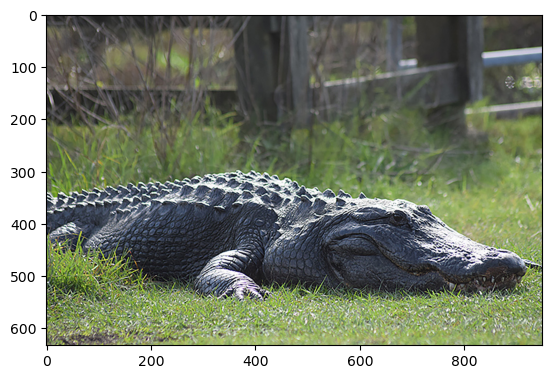

In [30]:
from torchvision import transforms
image = cv2.imread("./sample/alligator.jpg")
# 將圖片轉為黑白
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
input_batch = input_tensor.unsqueeze(0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
# 如果有 GPU 的話將模型移到 GPU 上加速
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

# 結果為 1*1000 的矩陣，代表對應 1000 個類別預測分數
with torch.no_grad():
    output = model(input_batch)

In [32]:
# 將分數轉換為機率
probabilities = torch.nn.functional.softmax(output[0], dim=0)
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# 取出前 5 個最有可能的類別
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

American alligator 0.2871130704879761
African crocodile 0.08221334964036942
hippopotamus 0.02637476660311222
Komodo dragon 0.02383621595799923
chimpanzee 0.016115523874759674


## Practice

1. 使用各種方法將修改短吻鱷的圖片，可以是前面教過的。
2. 讓 `resnet18` 模型辨認不出這是短吻鱷，但你自己可以辨認出來。

# Remarks

## Source

1. Multimodal Data Fusion and Analytics Group
2. Tommy Huang's Medium [link](https://chih-sheng-huang821.medium.com/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-cnn%E9%81%8B%E7%AE%97%E6%B5%81%E7%A8%8B-ecaec240a631)
3. Abhijeet Pujara's Medium [link](https://medium.com/analytics-vidhya/concept-of-alexnet-convolutional-neural-network-6e73b4f9ee30)


## Additional Information
1. CSIE5431 深度學習之應用 [link](https://www.youtube.com/watch?v=MwRn03_EkRw&list=PLOAQYZPRn2V4jYwTGKUH4YaU6NE6VROZX)
2. EE5184 機器學習 [link](https://speech.ee.ntu.edu.tw/~hylee/ml/2023-spring.php)
3. 現在電腦視覺的最新研究： Paper With Code [link](https://paperswithcode.com/)

## The sky is the limit!!

希望大家今天都有學到有趣的東西！